# PETSc performance breakdown (3D MMS)

This notebook mirrors the 2D profiling but solves a 3D manufactured case (paper Eq. 6.3) on UnitCube meshes with Dirichlet BCs from the exact pressures.

It produces a CSV and a couple of summary plots.

In [7]:
import os

os.environ["OMP_NUM_THREADS"] = "1"

from pathlib import Path
from typing import List
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from perphil.experiments.iterative_bench import Approach
from perphil.experiments.petsc_profiling_3d import run_perf_sweep_3d, save_perf_csv

RESULTS_PATH = Path("results-conforming-3d/petsc_profiling")
RESULTS_PATH.mkdir(parents=True, exist_ok=True)

## Parameters

In [ ]:
mesh_sizes: List[int] = [4, 8, 12, 16, 20, 32, 36, 40]
approaches: List[Approach] = [
    Approach.PLAIN_GMRES,
    Approach.GMRES_ILU,
    Approach.SS_GMRES,
    Approach.SS_GMRES_ILU,
    Approach.MONOLITHIC_MUMPS,
]
repeats = 3

## Run and collect

In [3]:
df = run_perf_sweep_3d(mesh_sizes, approaches, repeats=repeats, backend="events")
df.sort_values(["nx", "approach"])

[perf3d] nx=4 GMRES: iters=27, time_total=1.325e-02s, KSPSolve=5.102e-04s, flops_total=9.057e+06 (backend=events, repeats=3)
[perf3d] nx=4 GMRES + ILU PC: iters=6, time_total=1.203e-02s, KSPSolve=1.896e-04s, flops_total=5.548e+06 (backend=events, repeats=3)
[perf3d] nx=4 Scale-Splitting GMRES: iters=4, time_total=3.658e-02s, KSPSolve=2.153e-03s, flops_total=8.704e+06 (backend=events, repeats=3)
[perf3d] nx=4 Scale-Splitting GMRES + ILU PC: iters=4, time_total=3.367e-02s, KSPSolve=6.010e-04s, flops_total=1.179e+07 (backend=events, repeats=3)
[perf3d] nx=4 Scale-Splitting GMRES: iters=4, time_total=3.658e-02s, KSPSolve=2.153e-03s, flops_total=8.704e+06 (backend=events, repeats=3)
[perf3d] nx=4 Scale-Splitting GMRES + ILU PC: iters=4, time_total=3.367e-02s, KSPSolve=6.010e-04s, flops_total=1.179e+07 (backend=events, repeats=3)
[perf3d] nx=4 Monolithic LU with MUMPS: iters=1, time_total=1.249e-02s, KSPSolve=2.831e-04s, flops_total=4.519e+06 (backend=events, repeats=3)
[perf3d] nx=8 GMRES: 

,approach,nx,ny,dofs,num_cells,iterations,residual,time_total,time_total_repeats,time_SNESFunctionEval,...,mflops_SNESSolve,flops_MatMult,mflops_MatMult,flops_MatAssemblyBegin,mflops_MatAssemblyBegin,flops_total,mem_rss_peak_kb,mem_rss_delta_kb,backend,repeats
0,GMRES,4,4,250,384,27,0.000013,0.013248,0.039745,0.005104,...,351.712458,8.435340e+05,5598.850407,0.0,0.0,9.056946e+06,284456.0,576.0,events,3
1,GMRES + ILU PC,4,4,250,384,6,0.000021,0.012030,0.036089,0.004764,...,248.979668,1.874520e+05,5227.474274,0.0,0.0,5.548308e+06,285224.0,0.0,events,3
4,Monolithic LU with MUMPS,4,4,250,384,1,0.000000,0.012490,0.037470,0.004635,...,185.322848,0.000000e+00,0.000000,0.0,0.0,4.519104e+06,294248.0,576.0,events,3
2,Scale-Splitting GMRES,4,4,250,384,4,0.000010,0.036579,0.109737,0.004764,...,49.714349,1.630830e+05,3464.911722,0.0,0.0,8.703567e+06,290024.0,1728.0,events,3
3,Scale-Splitting GMRES + ILU PC,4,4,250,384,4,0.000010,0.033674,0.101023,0.004470,...,65.486515,5.442330e+05,5267.654574,0.0,0.0,1.179183e+07,292904.0,1920.0,events,3
5,GMRES,8,8,1458,3072,190,0.000368,0.017947,0.053840,0.004784,...,4579.210977,4.193498e+07,5577.241600,0.0,0.0,2.668001e+08,298472.0,960.0,events,3
6,GMRES + ILU PC,8,8,1458,3072,8,0.057920,0.014659,0.043977,0.004711,...,1449.120089,1.711632e+06,5538.831935,0.0,0.0,4.710531e+07,301928.0,960.0,events,3
9,Monolithic LU with MUMPS,8,8,1458,3072,1,0.000000,0.020837,0.062512,0.005176,...,671.843584,0.000000e+00,0.000000,0.0,0.0,4.061417e+07,311336.0,576.0,events,3
7,Scale-Splitting GMRES,8,8,1458,3072,4,0.005216,0.069462,0.208386,0.004872,...,202.730549,1.117791e+06,3391.757520,0.0,0.0,7.779832e+07,307880.0,1152.0,events,3
8,Scale-Splitting GMRES + ILU PC,8,8,1458,3072,4,0.005216,0.040314,0.120942,0.004827,...,485.356138,5.309391e+06,5340.606847,0.0,0.0,1.063318e+08,307880.0,0.0,events,3


## Save CSV

In [4]:
save_perf_csv(df, str(RESULTS_PATH / "petsc_perf_breakdown_3d.csv"))
df.head()

,approach,nx,ny,dofs,num_cells,iterations,residual,time_total,time_total_repeats,time_SNESFunctionEval,...,mflops_SNESSolve,flops_MatMult,mflops_MatMult,flops_MatAssemblyBegin,mflops_MatAssemblyBegin,flops_total,mem_rss_peak_kb,mem_rss_delta_kb,backend,repeats
0,GMRES,4,4,250,384,27,0.000013,0.013248,0.039745,0.005104,...,351.712458,843534.0,5598.850407,0.0,0.0,9056946.0,284456.0,576.0,events,3
1,GMRES + ILU PC,4,4,250,384,6,0.000021,0.012030,0.036089,0.004764,...,248.979668,187452.0,5227.474274,0.0,0.0,5548308.0,285224.0,0.0,events,3
2,Scale-Splitting GMRES,4,4,250,384,4,0.000010,0.036579,0.109737,0.004764,...,49.714349,163083.0,3464.911722,0.0,0.0,8703567.0,290024.0,1728.0,events,3
3,Scale-Splitting GMRES + ILU PC,4,4,250,384,4,0.000010,0.033674,0.101023,0.004470,...,65.486515,544233.0,5267.654574,0.0,0.0,11791830.0,292904.0,1920.0,events,3
4,Monolithic LU with MUMPS,4,4,250,384,1,0.000000,0.012490,0.037470,0.004635,...,185.322848,0.0,0.000000,0.0,0.0,4519104.0,294248.0,576.0,events,3


## Plots

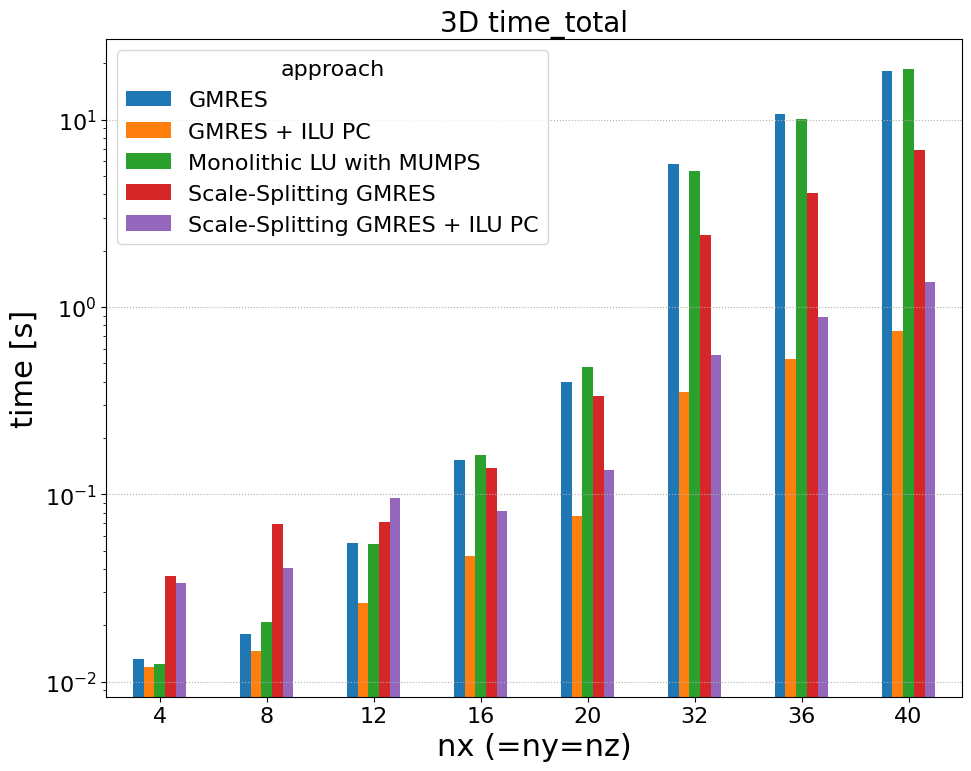

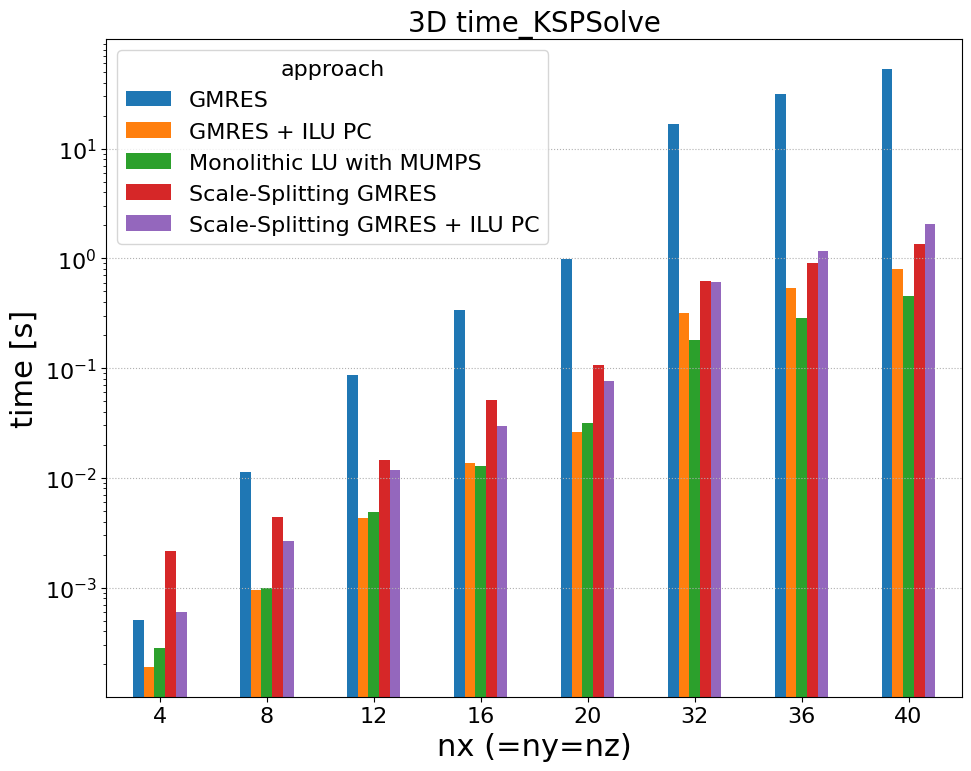

,approach,nx,ny,dofs,num_cells,iterations,residual,time_total,time_total_repeats,time_SNESFunctionEval,...,mflops_SNESSolve,flops_MatMult,mflops_MatMult,flops_MatAssemblyBegin,mflops_MatAssemblyBegin,flops_total,mem_rss_peak_kb,mem_rss_delta_kb,backend,repeats
0,GMRES,4,4,250,384,27,0.000013,0.013248,0.039745,0.005104,...,351.712458,8.435340e+05,5598.850407,0.0,0.0,9.056946e+06,284456.0,576.0,events,3
1,GMRES + ILU PC,4,4,250,384,6,0.000021,0.012030,0.036089,0.004764,...,248.979668,1.874520e+05,5227.474274,0.0,0.0,5.548308e+06,285224.0,0.0,events,3
2,Scale-Splitting GMRES,4,4,250,384,4,0.000010,0.036579,0.109737,0.004764,...,49.714349,1.630830e+05,3464.911722,0.0,0.0,8.703567e+06,290024.0,1728.0,events,3
3,Scale-Splitting GMRES + ILU PC,4,4,250,384,4,0.000010,0.033674,0.101023,0.004470,...,65.486515,5.442330e+05,5267.654574,0.0,0.0,1.179183e+07,292904.0,1920.0,events,3
4,Monolithic LU with MUMPS,4,4,250,384,1,0.000000,0.012490,0.037470,0.004635,...,185.322848,0.000000e+00,0.000000,0.0,0.0,4.519104e+06,294248.0,576.0,events,3
5,GMRES,8,8,1458,3072,190,0.000368,0.017947,0.053840,0.004784,...,4579.210977,4.193498e+07,5577.241600,0.0,0.0,2.668001e+08,298472.0,960.0,events,3
6,GMRES + ILU PC,8,8,1458,3072,8,0.057920,0.014659,0.043977,0.004711,...,1449.120089,1.711632e+06,5538.831935,0.0,0.0,4.710531e+07,301928.0,960.0,events,3
7,Scale-Splitting GMRES,8,8,1458,3072,4,0.005216,0.069462,0.208386,0.004872,...,202.730549,1.117791e+06,3391.757520,0.0,0.0,7.779832e+07,307880.0,1152.0,events,3
8,Scale-Splitting GMRES + ILU PC,8,8,1458,3072,4,0.005216,0.040314,0.120942,0.004827,...,485.356138,5.309391e+06,5340.606847,0.0,0.0,1.063318e+08,307880.0,0.0,events,3
9,Monolithic LU with MUMPS,8,8,1458,3072,1,0.000000,0.020837,0.062512,0.005176,...,671.843584,0.000000e+00,0.000000,0.0,0.0,4.061417e+07,311336.0,576.0,events,3


In [ ]:
for metric in ("time_total", "time_KSPSolve"):
    pivot = df.pivot(index="nx", columns="approach", values=metric).sort_index()
    ax = pivot.plot(kind="bar", figsize=(10, 8), title=f"3D {metric}", rot=0, logy=True)
    ax.set_xlabel("nx (=ny=nz)")
    ax.set_ylabel("time [s]")
    ax.grid(axis="y", ls=":")
    plt.tight_layout()
    plt.savefig(RESULTS_PATH / f"petsc_{metric}_3d_bar.png")
    plt.show()

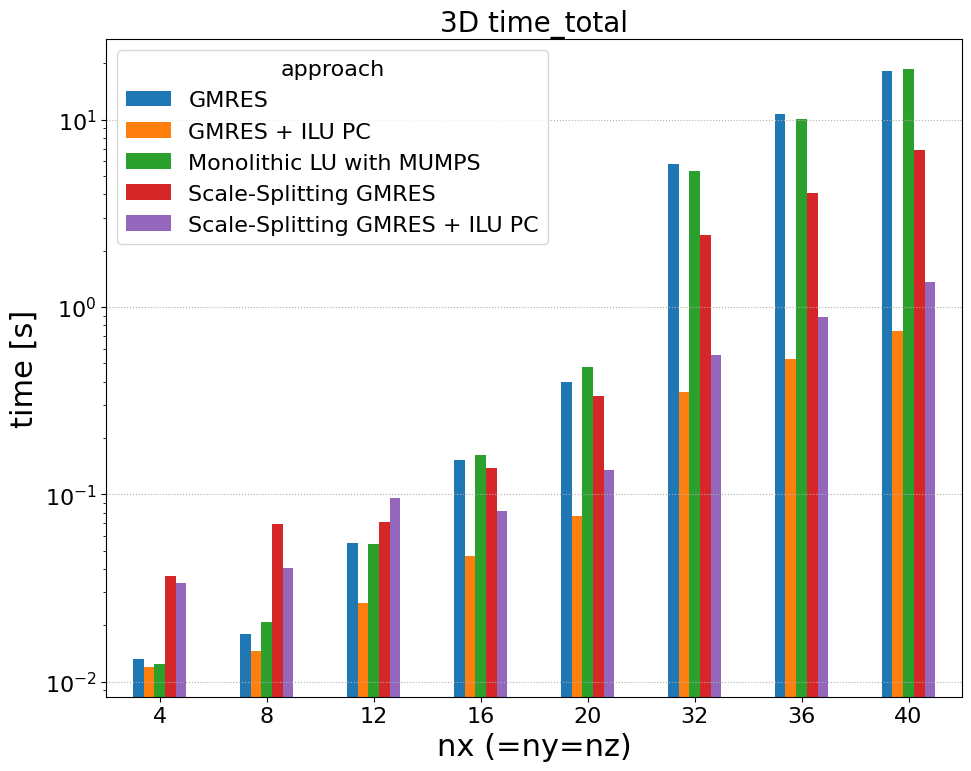

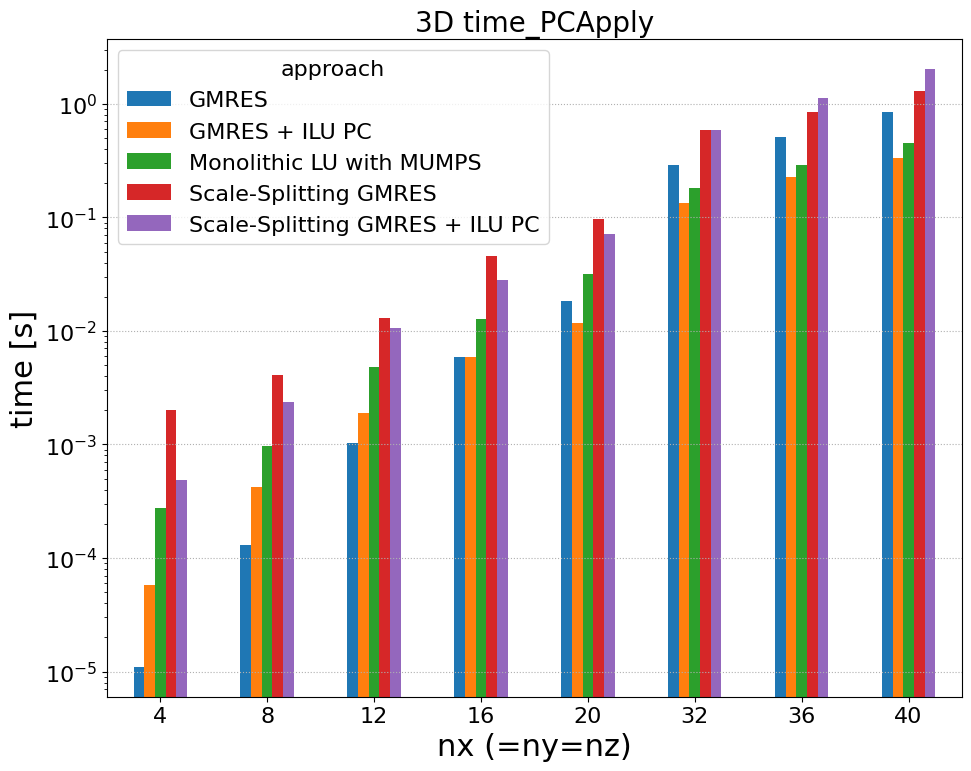

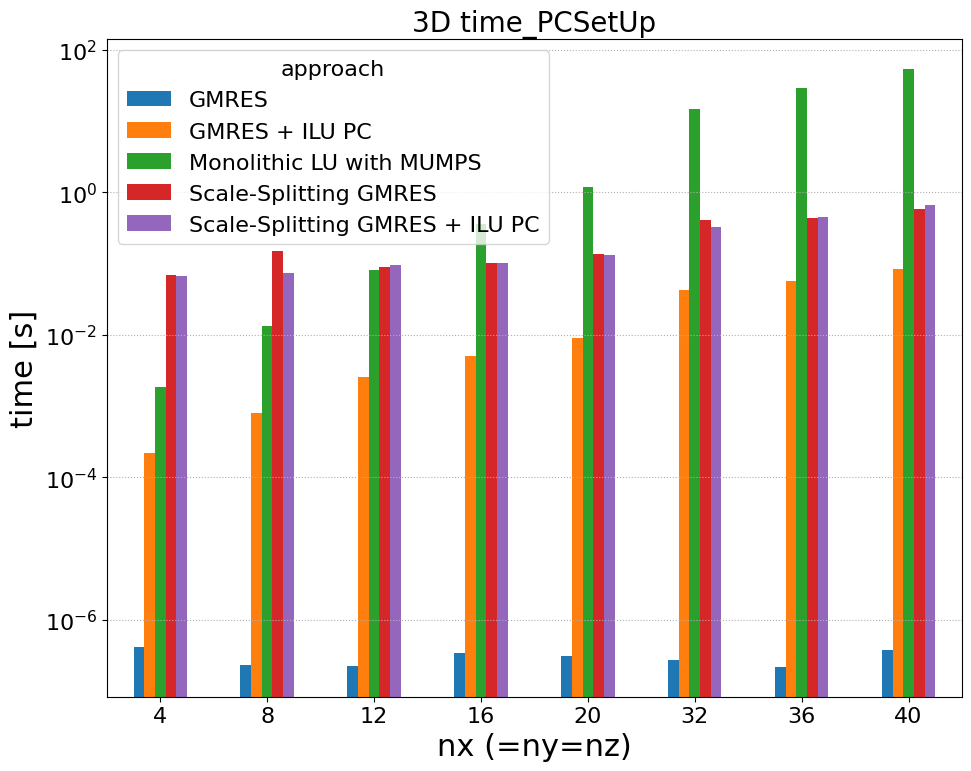

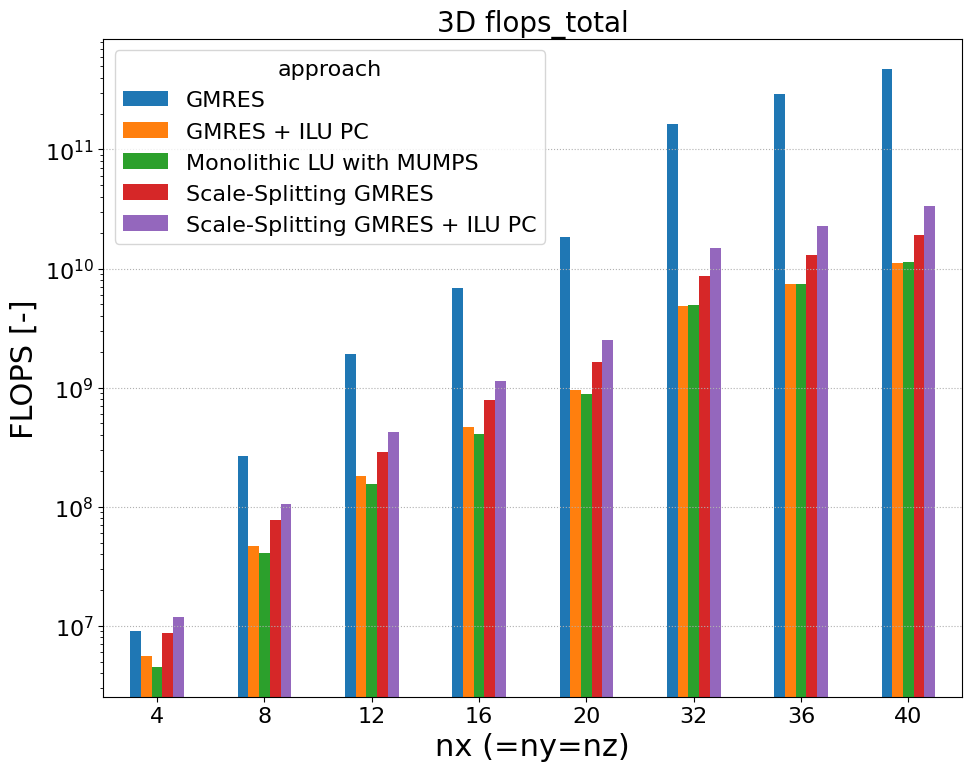

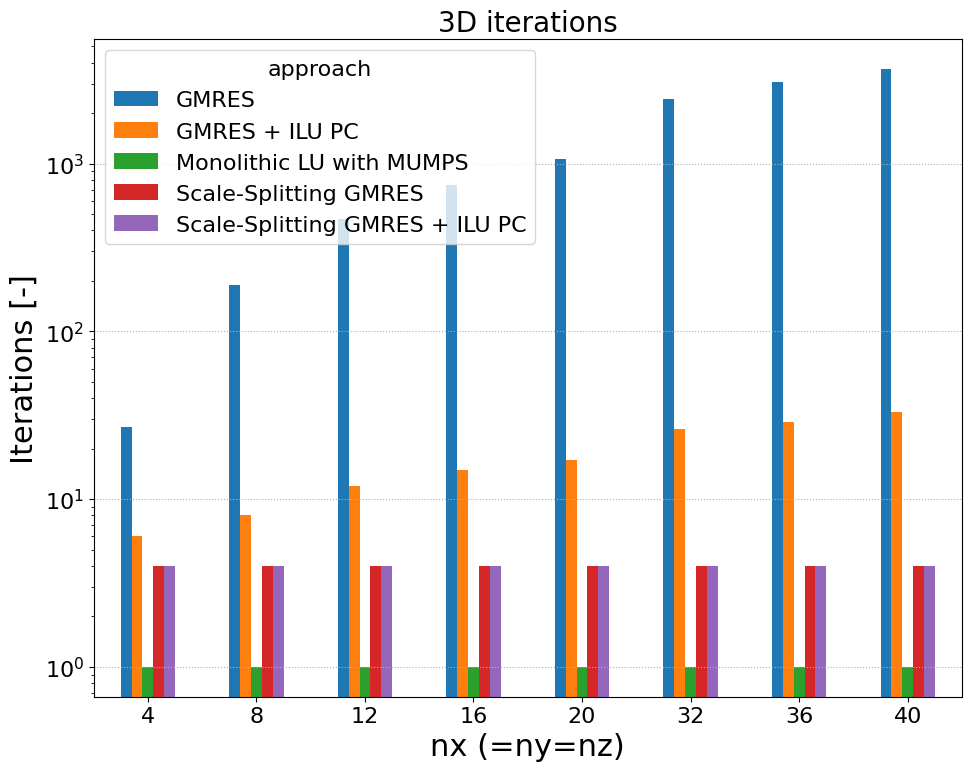

,approach,num_cells,solve_per_iteration,time_per_iteration,pc_factorization_per_time,pc_application_per_time
0,GMRES,384,0.000019,0.000491,3.155100e-05,0.000831
1,GMRES + ILU PC,384,0.000032,0.002005,1.827066e-02,0.004763
2,Scale-Splitting GMRES,384,0.000538,0.009145,1.875326e+00,0.055051
3,Scale-Splitting GMRES + ILU PC,384,0.000150,0.008419,1.967338e+00,0.014533
5,GMRES,3072,0.000059,0.000094,1.264862e-05,0.007327
6,GMRES + ILU PC,3072,0.000118,0.001832,5.470066e-02,0.029044
7,Scale-Splitting GMRES,3072,0.001110,0.017365,2.175393e+00,0.058429
8,Scale-Splitting GMRES + ILU PC,3072,0.000658,0.010079,1.827106e+00,0.058192
10,GMRES,10368,0.000188,0.000119,4.027674e-06,0.018825
11,GMRES + ILU PC,10368,0.000358,0.002184,9.687288e-02,0.071774


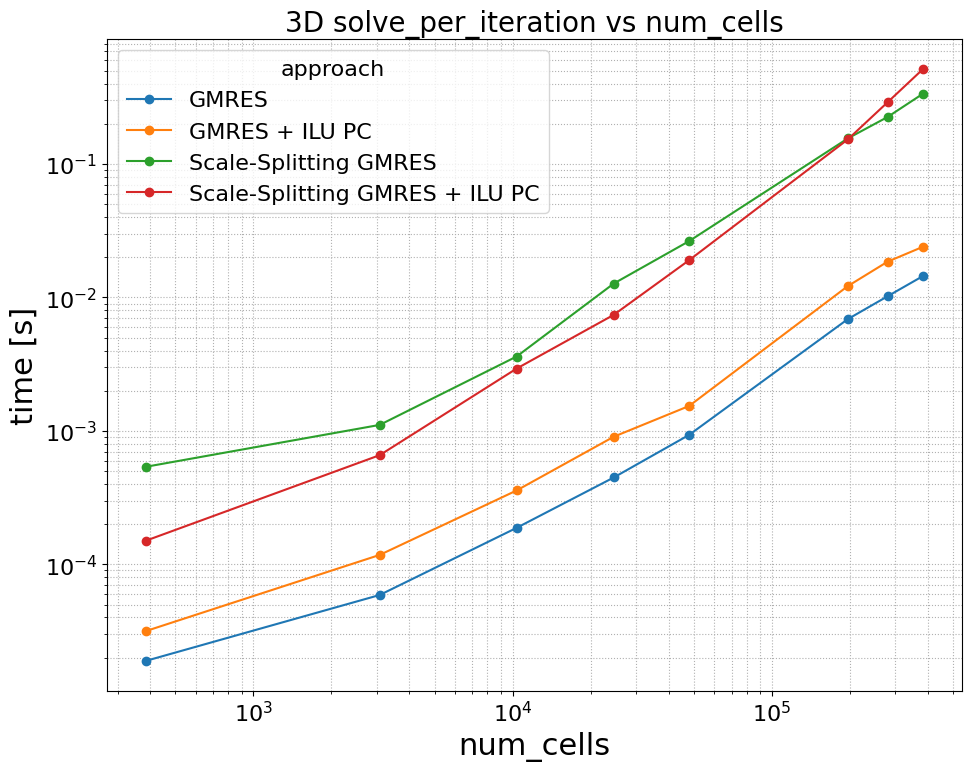

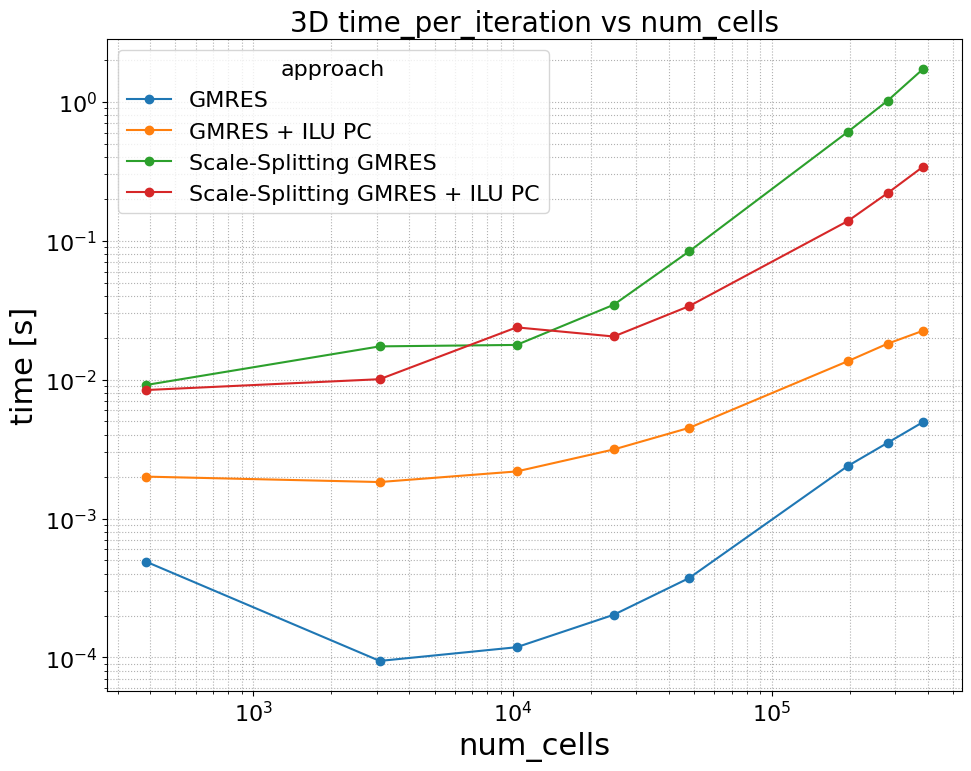

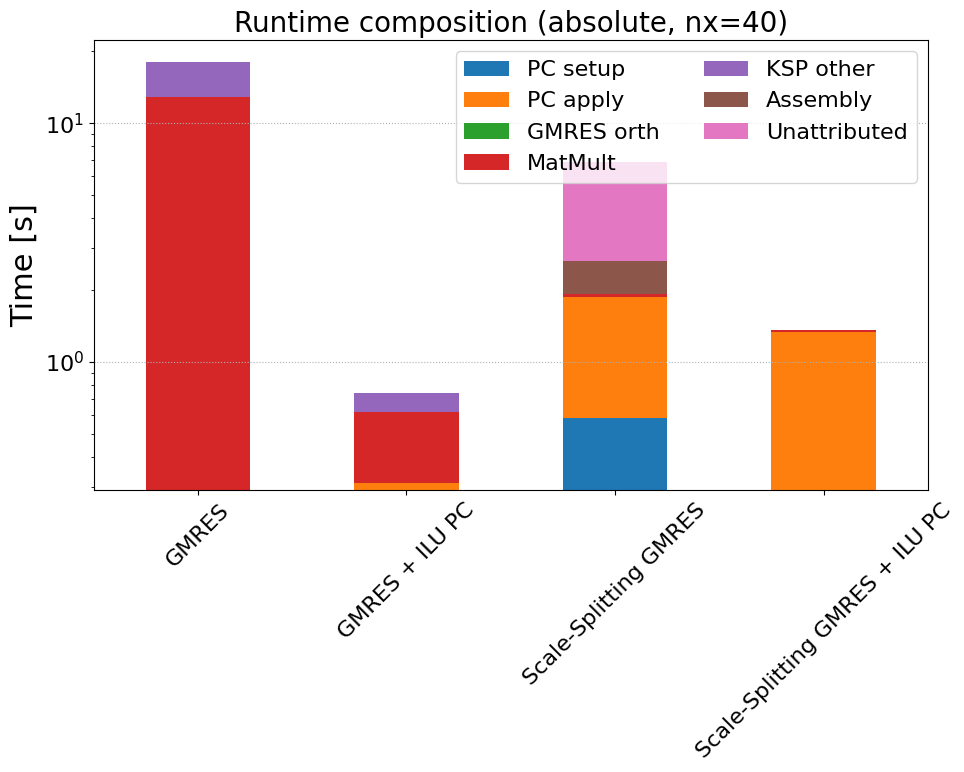

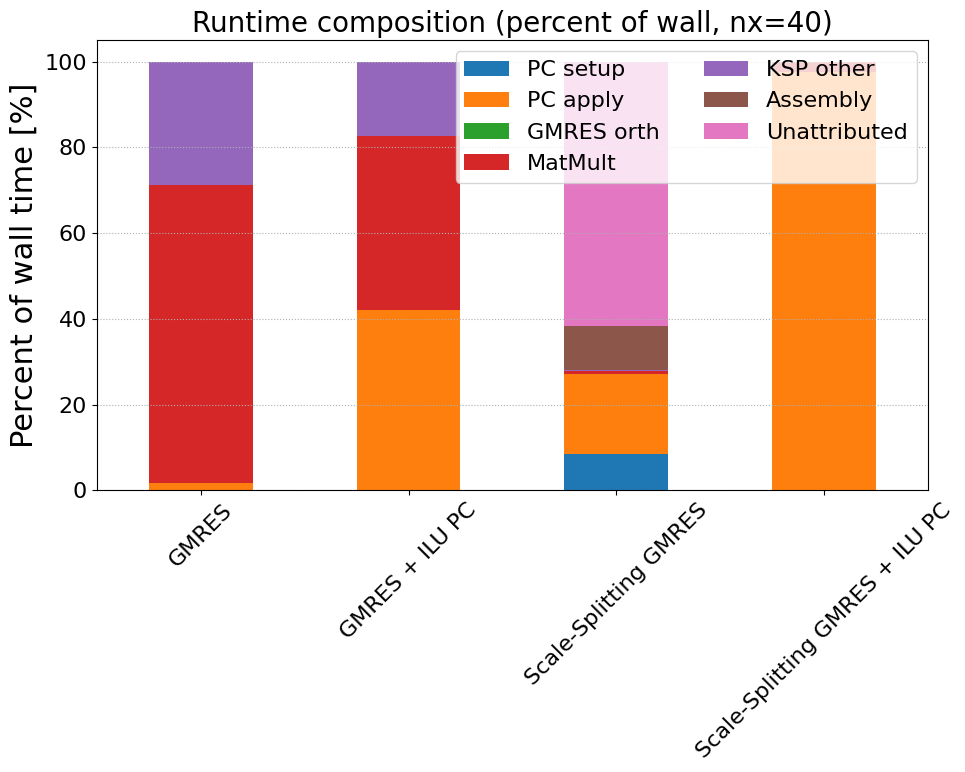

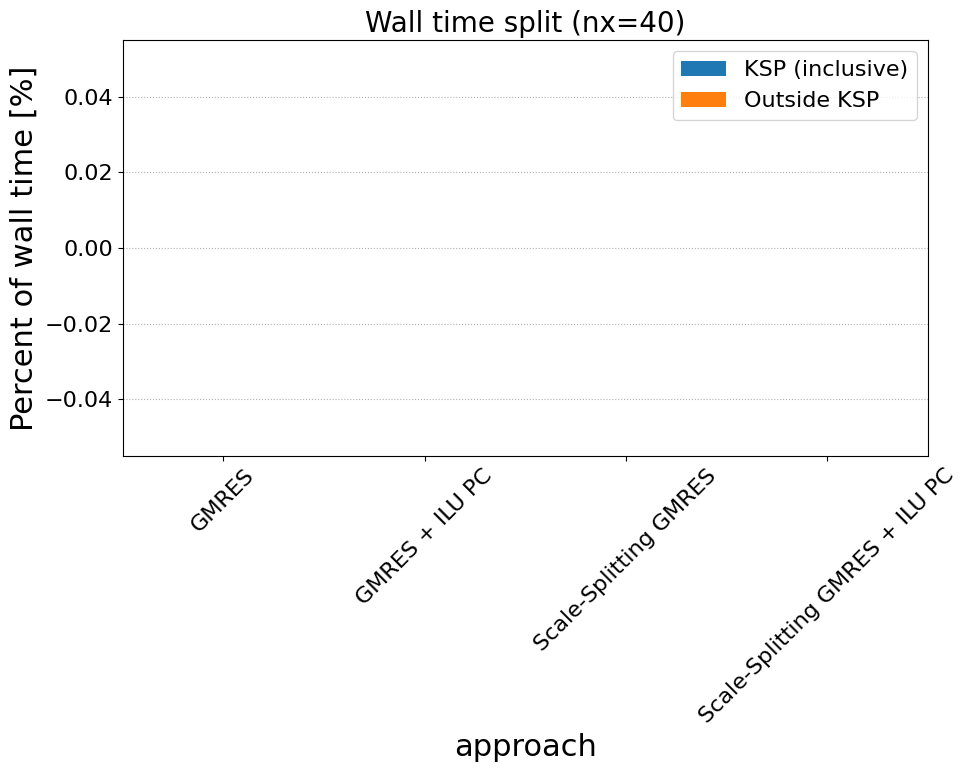

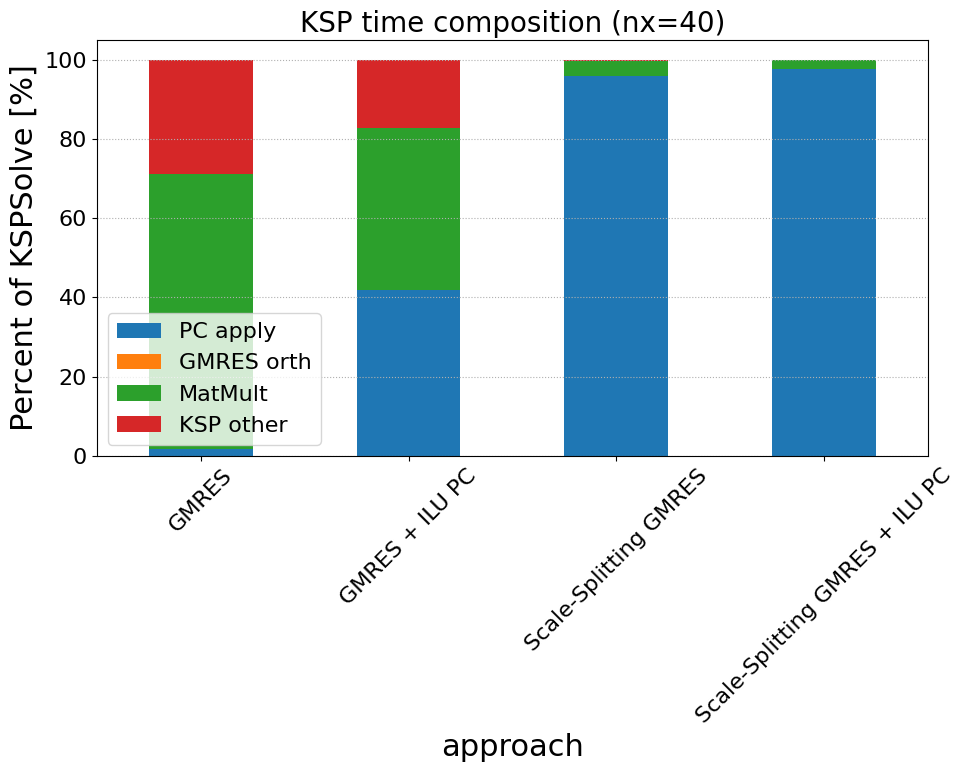

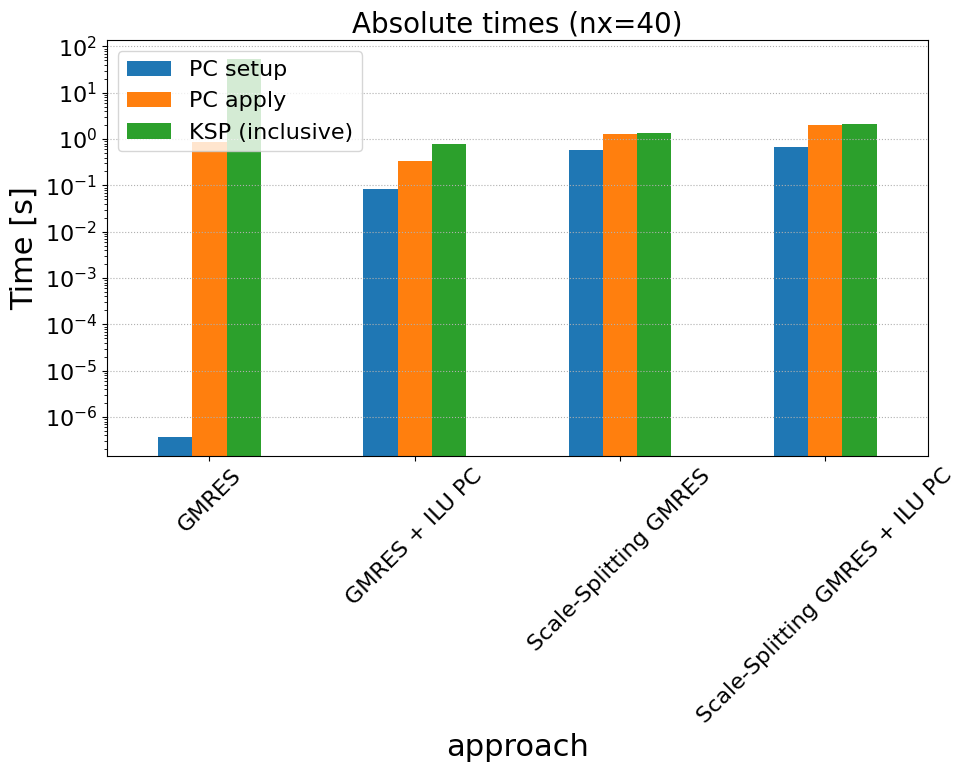

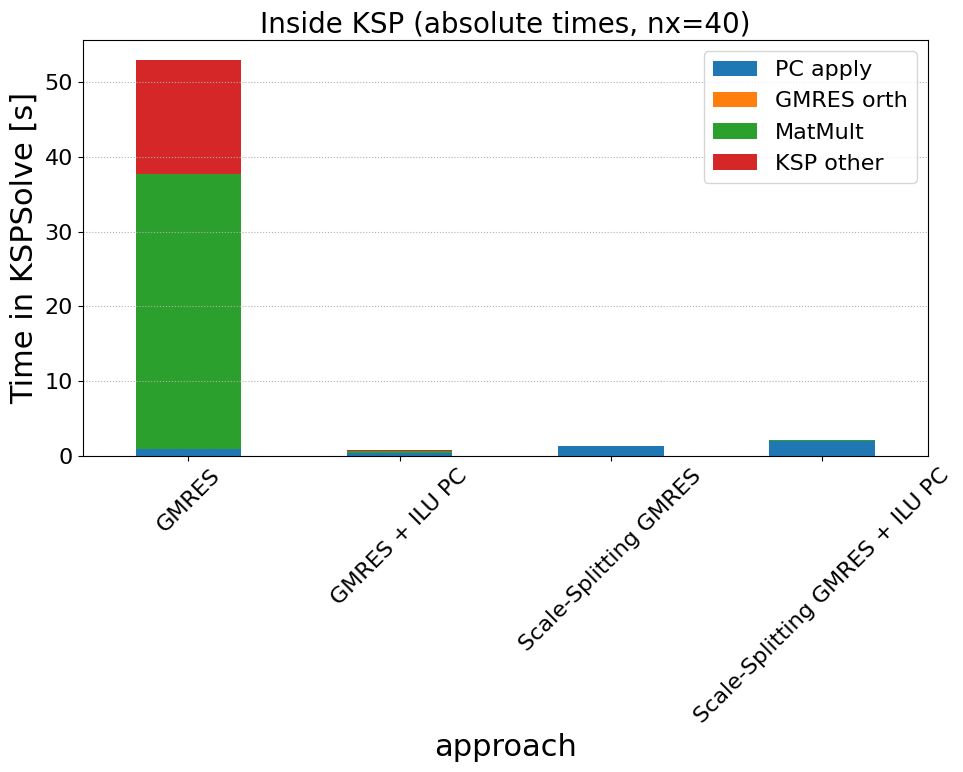

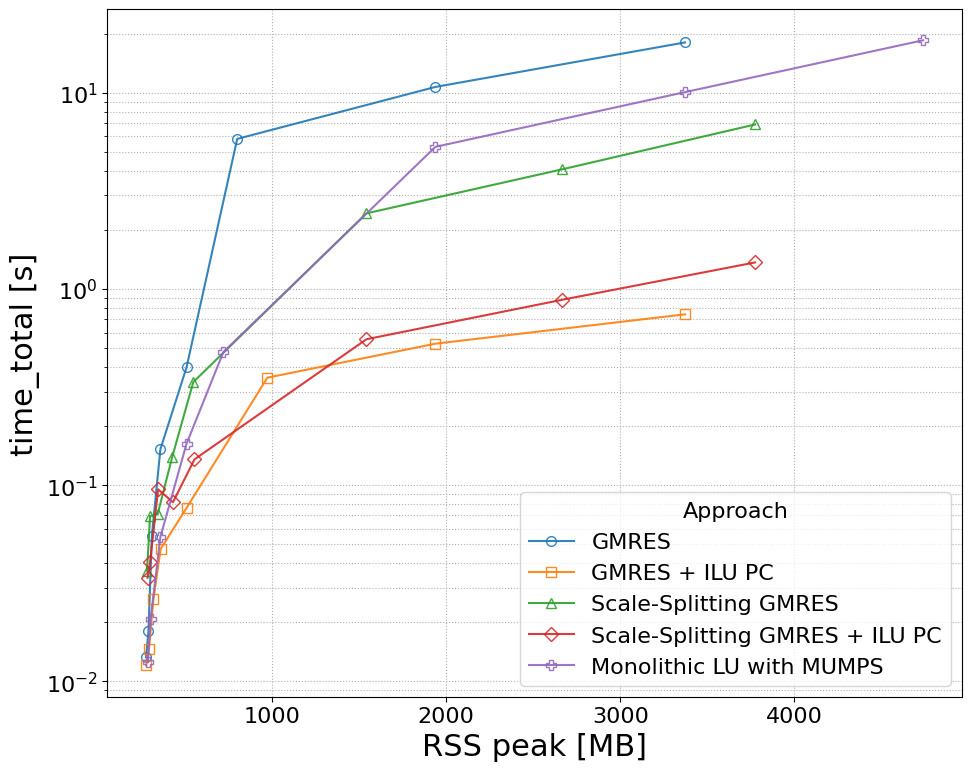

In [ ]:
# Additional plots matching 2D notebook, adapted for 3D
for metric in ("time_total", "time_PCApply", "time_PCSetUp"):
    pivot = df.pivot(index="nx", columns="approach", values=metric).sort_index()
    ax = pivot.plot(kind="bar", figsize=(10, 8), title=f"3D {metric}", logy=True, rot=0)
    ax.set_xlabel("nx (=ny=nz)")
    ax.set_ylabel("time [s]")
    ax.grid(axis="y", ls=":")
    plt.tight_layout()
    plt.savefig(RESULTS_PATH / f"petsc_{metric}_3d_bar.png")
    plt.show()

pivot = df.pivot(index="nx", columns="approach", values="flops_total").sort_index()
ax = pivot.plot(kind="bar", figsize=(10, 8), title="3D flops_total", logy=True, rot=0)
ax.set_xlabel("nx (=ny=nz)")
ax.set_ylabel("FLOPS [-]")
ax.grid(axis="y", ls=":")
plt.tight_layout()
plt.savefig(RESULTS_PATH / "petsc_flops_3d_bar.png")
plt.show()

pivot = df.pivot(index="nx", columns="approach", values="iterations").sort_index()
ax = pivot.plot(kind="bar", figsize=(10, 8), title="3D iterations", logy=True, rot=0)
ax.set_xlabel("nx (=ny=nz)")
ax.set_ylabel("Iterations [-]")
ax.grid(axis="y", ls=":")
plt.tight_layout()
plt.savefig(RESULTS_PATH / "petsc_iterations_3d_bar.png")
plt.show()

# Picard per-iteration diagnostics (may be empty if no Picard runs)
df_picard = df[df["approach"].str.contains("Picard", na=False)]
if not df_picard.empty:
    df_picard_per_iteration = pd.DataFrame(
        {
            "approach": df_picard["approach"],
            "num_cells": df_picard["num_cells"],
            "solve_per_iteration": df_picard.get("time_SNESSolve", 0.0)
            / df_picard["iterations"],
            "time_per_iteration": df_picard["time_total"] / df_picard["iterations"],
        }
    )
    # display(df_picard_per_iteration)

# GMRES per-iteration and shares
df_gmres = df[df["approach"].str.contains("GMRES", na=False)]
df_gmres_per_iteration = pd.DataFrame(
    {
        "approach": df_gmres["approach"],
        "num_cells": df_gmres["num_cells"],
        "solve_per_iteration": df_gmres.get("time_KSPSolve", 0.0)
        / df_gmres["iterations"],
        "time_per_iteration": df_gmres["time_total"] / df_gmres["iterations"],
        "pc_factorization_per_time": df_gmres.get("time_PCSetUp", 0.0)
        / df_gmres["time_total"],
        "pc_application_per_time": df_gmres.get("time_PCApply", 0.0)
        / df_gmres["time_total"],
    }
)
# display(df_gmres_per_iteration)

for metric in ("solve_per_iteration", "time_per_iteration"):
    pivot = df_gmres_per_iteration.pivot(
        index="num_cells", columns="approach", values=metric
    ).sort_index()
    ax = pivot.plot(
        marker="o",
        figsize=(10, 8),
        title=f"3D {metric} vs num_cells",
        logx=True,
        logy=True,
    )
    ax.set_xlabel("num_cells")
    ax.set_ylabel("time [s]")
    ax.grid(which="both", ls=":")
    plt.tight_layout()
    plt.savefig(RESULTS_PATH / f"{metric}_3d_scaling.png")
    plt.show()

# Time breakdown at largest nx for GMRES approaches
nx_target = int(pd.to_numeric(df["nx"], errors="coerce").max())
dft = df[
    (pd.to_numeric(df["nx"], errors="coerce") == nx_target)
    & (df["approach"].astype(str).str.contains("GMRES"))
].copy()


def _assembly_row(r):
    return (
        float(r.get("time_SNESFunctionEval", 0.0))
        + float(r.get("time_SNESJacobianEval", 0.0))
        + float(r.get("time_MatAssemblyBegin", 0.0))
        + float(r.get("time_MatAssemblyEnd", 0.0))
    )


def _partition_row_wall(r):
    tot = max(float(r.get("time_total", 0.0)), 0.0)
    ksp = max(float(r.get("time_KSPSolve", 0.0)), 0.0)
    pcsetup = max(float(r.get("time_PCSetUp", 0.0)), 0.0)
    pcapply = max(float(r.get("time_PCApply", 0.0)), 0.0)
    matmult_all = max(float(r.get("time_MatMult", 0.0)), 0.0)
    gmres_orth_all = max(
        float(r.get("time_KSPGMRESOrthogonalization", 0.0)), 0.0
    ) + max(float(r.get("time_KSPGMRESBuildBasis", 0.0)), 0.0)
    assembly_all = max(_assembly_row(r), 0.0)

    rem_ksp = ksp
    pcapply_ex = min(pcapply, rem_ksp)
    rem_ksp -= pcapply_ex
    gmres_orth_ex = min(gmres_orth_all, rem_ksp)
    rem_ksp -= gmres_orth_ex
    matmult_ex = min(matmult_all, rem_ksp)
    rem_ksp -= matmult_ex
    ksp_other = max(rem_ksp, 0.0)

    ksp_sum = pcapply_ex + gmres_orth_ex + matmult_ex + ksp_other
    if tot > 0.0 and ksp_sum > tot:
        scale = tot / ksp_sum
        pcapply_ex *= scale
        gmres_orth_ex *= scale
        matmult_ex *= scale
        ksp_other *= scale
        ksp_sum = pcapply_ex + gmres_orth_ex + matmult_ex + ksp_other

    rem_out = max(tot - ksp_sum, 0.0)
    pcsetup_ex = min(pcsetup, rem_out)
    rem_out -= pcsetup_ex
    assembly_ex = min(assembly_all, rem_out)
    rem_out -= assembly_ex
    unattributed = max(rem_out, 0.0)

    return pd.Series(
        {
            "PC setup": pcsetup_ex,
            "PC apply": pcapply_ex,
            "GMRES orth": gmres_orth_ex,
            "MatMult": matmult_ex,
            "KSP other": ksp_other,
            "Assembly": assembly_ex,
            "Unattributed": unattributed,
        }
    )


if not dft.empty:
    parts = dft.apply(_partition_row_wall, axis=1)
    err = (parts.sum(axis=1) - dft["time_total"].astype(float)).abs()
    assert (err < 1e-9).all() or (
        err / dft["time_total"].replace(0, np.nan) < 1e-6
    ).all()

    # Absolute seconds (stack sums to time_total)
    parts.index = dft["approach"].astype(str).values
    ax = parts.plot(
        kind="bar",
        stacked=True,
        figsize=(10, 8),
        title=f"Runtime composition (absolute, nx={nx_target})",
        rot=45,
        logy=True,
    )
    ax.set_ylabel("Time [s]")
    ax.legend(loc="upper right", ncols=2)
    ax.grid(axis="y", ls=":")
    plt.tight_layout()
    plt.savefig(RESULTS_PATH / f"time_breakdown_wall_absolute_3d_nx{nx_target}.png")
    plt.show()

    # Percent of total runtime
    percent = 100.0 * parts.div(dft["time_total"].values, axis=0).clip(lower=0.0)
    ax = percent.plot(
        kind="bar",
        stacked=True,
        figsize=(10, 8),
        title=f"Runtime composition (percent of wall, nx={nx_target})",
        rot=45,
    )
    ax.set_ylabel("Percent of wall time [%]")
    ax.legend(loc="upper right", ncols=2)
    ax.grid(axis="y", ls=":")
    plt.tight_layout()
    plt.savefig(RESULTS_PATH / f"time_breakdown_wall_percent_3d_nx{nx_target}.png")
    plt.show()

    # Wall time split: KSP inclusive vs outside
    ksp_incl = dft["time_KSPSolve"].astype(float).clip(lower=0.0)
    outside = (dft["time_total"].astype(float) - ksp_incl).clip(lower=0.0)
    total_percent = 100.0 * pd.DataFrame(
        {"KSP (inclusive)": ksp_incl, "Outside KSP": outside}, index=dft["approach"]
    ).div(dft["time_total"].values, axis=0)
    ax = total_percent.plot(
        kind="bar",
        stacked=True,
        figsize=(10, 8),
        title=f"Wall time split (nx={nx_target})",
        rot=45,
    )
    ax.set_ylabel("Percent of wall time [%]")
    ax.grid(axis="y", ls=":")
    plt.tight_layout()
    plt.savefig(RESULTS_PATH / f"time_split_ksp_vs_outside_3d_nx{nx_target}.png")
    plt.show()

    # Inside-KSP breakdown (percent of KSPSolve)
    def _ksp_breakdown_row(r):
        ksp = float(r.get("time_KSPSolve", 0.0))
        rem = max(ksp, 0.0)
        pcapply = float(r.get("time_PCApply", 0.0))
        gmres_orth = float(r.get("time_KSPGMRESOrthogonalization", 0.0)) + float(
            r.get("time_KSPGMRESBuildBasis", 0.0)
        )
        matmult = float(r.get("time_MatMult", 0.0))
        pcapply_ex = min(pcapply, rem)
        rem -= pcapply_ex
        gmres_orth_ex = min(gmres_orth, rem)
        rem -= gmres_orth_ex
        matmult_ex = min(matmult, rem)
        rem -= matmult_ex
        ksp_other = max(rem, 0.0)
        return pd.Series(
            {
                "PC apply": pcapply_ex,
                "GMRES orth": gmres_orth_ex,
                "MatMult": matmult_ex,
                "KSP other": ksp_other,
            }
        )

    kparts = dft.apply(_ksp_breakdown_row, axis=1)
    den = dft["time_KSPSolve"].replace(0, np.nan).values
    kpercent = 100.0 * kparts.div(den, axis=0)
    ax = kpercent.set_index(dft["approach"]).plot(
        kind="bar",
        stacked=True,
        figsize=(10, 8),
        title=f"KSP time composition (nx={nx_target})",
        rot=45,
    )
    ax.set_ylabel("Percent of KSPSolve [%]")
    ax.grid(axis="y", ls=":")
    plt.tight_layout()
    plt.savefig(RESULTS_PATH / f"ksp_composition_percent_3d_nx{nx_target}.png")
    plt.show()

    # Absolute comps side by side
    def _num_col(df_, name):
        if name in df_:
            s = pd.to_numeric(df_[name], errors="coerce")
            return s.fillna(0.0).astype(float).clip(lower=0.0)
        return pd.Series(0.0, index=df_.index, dtype=float)

    pcsetup = _num_col(dft, "time_PCSetUp")
    pcapply = _num_col(dft, "time_PCApply")
    ksp_incl = _num_col(dft, "time_KSPSolve")
    abs_df = pd.DataFrame(
        {
            "approach": dft["approach"].astype(str).values,
            "PC setup": pcsetup.values,
            "PC apply": pcapply.values,
            "KSP (inclusive)": ksp_incl.values,
        }
    ).set_index("approach")
    ax = abs_df.plot(
        kind="bar",
        stacked=False,
        rot=45,
        figsize=(10, 8),
        title=f"Absolute times (nx={nx_target})",
        logy=True,
    )
    ax.set_ylabel("Time [s]")
    ax.grid(axis="y", ls=":")
    plt.tight_layout()
    plt.savefig(RESULTS_PATH / f"pc_setup_apply_ksp_absolute_3d_nx{nx_target}.png")
    plt.show()

    # Inside-KSP absolute breakdown
    pcapply = _num_col(dft, "time_PCApply")
    matmult = _num_col(dft, "time_MatMult")
    gmres_orth = _num_col(dft, "time_KSPGMRESOrthogonalization") + _num_col(
        dft, "time_KSPGMRESBuildBasis"
    )
    ksp = _num_col(dft, "time_KSPSolve")
    pcapply_ex = pd.concat([pcapply, ksp], axis=1).min(axis=1)
    rem = (ksp - pcapply_ex).clip(lower=0.0)
    gmres_orth_ex = pd.concat([gmres_orth, rem], axis=1).min(axis=1)
    rem = (rem - gmres_orth_ex).clip(lower=0.0)
    matmult_ex = pd.concat([matmult, rem], axis=1).min(axis=1)
    ksp_other = (rem - matmult_ex).clip(lower=0.0)
    kparts_abs = pd.DataFrame(
        {
            "approach": dft["approach"].astype(str).values,
            "PC apply": pcapply_ex.values,
            "GMRES orth": gmres_orth_ex.values,
            "MatMult": matmult_ex.values,
            "KSP other": ksp_other.values,
        }
    ).set_index("approach")
    ax = kparts_abs.plot(
        kind="bar",
        stacked=True,
        rot=45,
        figsize=(10, 8),
        title=f"Inside KSP (absolute times, nx={nx_target})",
    )
    ax.set_ylabel("Time in KSPSolve [s]")
    ax.grid(axis="y", ls=":")
    plt.tight_layout()
    plt.savefig(RESULTS_PATH / f"ksp_internal_absolute_3d_nx{nx_target}.png")
    plt.show()

# Time vs Memory plot
df_plot = df.assign(mem_mb=(df.get("mem_rss_peak_kb", np.nan) / 1024.0))
markers = ["o", "s", "^", "D", "P", "X", "*", "v", "<", ">", "h"]
approaches_in_order = list(dict.fromkeys(df_plot["approach"]))
marker_map = {ap: markers[i % len(markers)] for i, ap in enumerate(approaches_in_order)}
fig, ax = plt.subplots(figsize=(10, 8))
for ap, sub in df_plot.groupby("approach", sort=False):
    sub = sub.sort_values("mem_mb")
    ax.plot(
        sub["mem_mb"],
        sub["time_total"],
        marker=marker_map[ap],
        markersize=7,
        markerfacecolor="none",
        linewidth=1.5,
        label=ap,
        alpha=0.9,
    )
ax.set_yscale("log")
ax.set_xlabel("RSS peak [MB]")
ax.set_ylabel("time_total [s]")
ax.grid(which="both", ls=":")
ax.legend(loc="best", title="Approach")
plt.tight_layout()
plt.savefig(RESULTS_PATH / "time_vs_memory_3d_lines.png")
plt.show()

# Show the dataframe last
# df